ImageView object:
  Display bands       :  [0, 3, 6]
  Interpolation       :  <default>
  RGB data limits     :
    R: [8348.0, 14783.0]
    G: [7747.0, 20602.0]
    B: [7247.0, 12134.0]

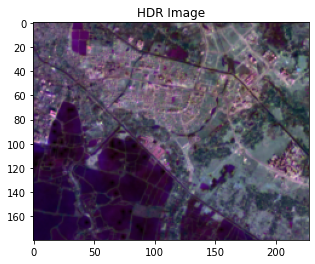

In [1]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Load the image
img = io.envi.open('subset2.hdr')



# Customize the display with additional parameters
spectral.imshow(img, cmap='gray', title='HDR Image')

In [2]:


band7 = img[:, :, 6].astype(float)
band6 = img[:, :, 5].astype(float)
band5 = img[:, :, 4].astype(float) 
band4 = img[:, :, 3].astype(float) 
band3 = img[:, :,2].astype(float)
band2 = img[:, :,1].astype(float)
band1 = img[:, :,0].astype(float)

# Calculate NDVI 
# ndvi = (nir - red) / (nir + red)

# # Calculate NDWI
# ndwi = (green - nir) / (green + nir)

# # Calculate NDBI
# ndbi = (swir1 - nir) / (swir1 + nir)

# ndvi = (band1 - band2) / (band1 + band2)

# # Calculate NDWI
# ndwi = (band5 - band6) / (band5 + band6)

# # Calculate NDBI
# ndbi = (band6 - band5) / (band6 + band5)


ndvi = (band4 - band3) / (band4 + band3)

# Calculate NDWI
ndwi = (band4 - band5) / (band5 + band4)

# Calculate NDBI
ndbi = (band5 - band4) / (band5 + band4)

MNDWI =(band2 - band5) / (band2 + band5)



In [3]:
import numpy as np
ndvi_count = np.count_nonzero(ndvi>0)
ndwi_count = np.count_nonzero(ndwi>0.13)
ndbi_count = np.count_nonzero(ndbi>0)
MNDWI_countB = np.count_nonzero((MNDWI > 0) & (MNDWI <= 0.2))
MNDWI_countV = np.count_nonzero(MNDWI >= 0.23)
MNDWI_countw = np.count_nonzero(MNDWI <-0.03)



print('Number of non-zero values in NDVI:', ndvi_count)
print('Number of non-zero values in NDWI:', ndwi_count)
print('Number of non-zero values in NDBI:', ndbi_count)#2013

print('Number of non-zero values in MNDWB:', MNDWI_countB)
print('Number of non-zero values in MNDWV:', MNDWI_countV)
print('Number of non-zero values in MNDWW:', MNDWI_countw)


Number of non-zero values in NDVI: 15
Number of non-zero values in NDWI: 649
Number of non-zero values in NDBI: 13187
Number of non-zero values in MNDWB: 32264
Number of non-zero values in MNDWV: 957
Number of non-zero values in MNDWW: 326


In [4]:
import pandas as pd


In [5]:
# Create DataFrames and save to CSV
df_ndvi = pd.DataFrame({'ndvi': ndvi.ravel()})
df_ndvi = df_ndvi[df_ndvi['ndvi'] > 0]
df_ndvi.to_csv('ndvi_data.csv', index=False)

In [6]:
df_ndbi = pd.DataFrame({'ndbi': ndbi.ravel()})
df_ndbi = df_ndbi[df_ndbi['ndbi'] > 0]
df_ndbi.to_csv('ndbi_data.csv', index=False)

In [7]:
df_ndwi = pd.DataFrame({'ndwi': ndwi.ravel()})
df_ndwi = df_ndwi[df_ndwi['ndwi'] > 0.13]
df_ndwi.to_csv('ndwi_data.csv', index=False)


In [8]:
import pandas as pd

ndvi_data = pd.read_csv('ndvi_data.csv')
ndwi_data = pd.read_csv('ndvi_data.csv')
ndbi_data = pd.read_csv('ndvi_data.csv')

In [9]:
import numpy as np
import rasterio

# Read the CSV file
df = pd.read_csv('ndvi_data.csv')

# Convert the NDVI column to a NumPy array
ndvi_data = df['ndvi'].values

# Determine the appropriate shape for the array
width = int(np.sqrt(len(ndvi_data)))
height = (len(ndvi_data) + width - 1) // width

# Reshape the NDVI array into the determined shape
ndvi_data = ndvi_data.reshape((height, width))

# Define the TIF file name and its parameters
tif_file = 'ndvi.tif'
transform = rasterio.transform.from_origin(0, 0, 1, 1)  # Replace with appropriate values

# Create the TIF file and write the NDVI data to it
with rasterio.open(tif_file, 'w', driver='GTiff', height=height, width=width, count=1, dtype=ndvi_data.dtype, crs='+proj=latlong', transform=transform) as dst:
    dst.write(ndvi_data, 1)


C:\Users\Abhisek\AppData\Roaming\Python\Python39\site-packages\rasterio\__init__.py:342: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


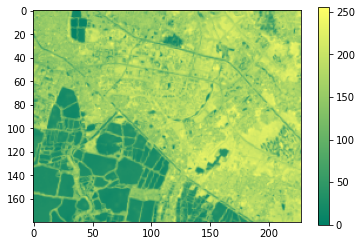

In [4]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIF file using rasterio
with rasterio.open('ndwi.tif') as src:
    # Read the first band of the image
    ndvi_band = src.read(1)
    
    # Visualize the image using matplotlib
    plt.imshow(ndvi_band, cmap=plt.cm.summer)
    plt.colorbar()
    plt.show()


In [6]:
import tifffile as tiff

# Load the TIFF image
image = tiff.imread('ndvi_2022.tif')

# Get the shape of the image (height, width, channels)
height, width, channels = image.shape

# Print the height and width
print(f"Height: {height}")
print(f"Width: {width}")


Height: 172
Width: 200


In [10]:
import rasterio

# Open the image file
with rasterio.open('ndbi_2022.tif') as dataset:
    # Retrieve the spatial resolution
    spatial_resolution = dataset.res

# Print the spatial resolution
print("Spatial Resolution:", spatial_resolution)


Spatial Resolution: (1.0, 1.0)


In [5]:
import spectral

image_path = "subset2.hdr"
hdr_image = spectral.open_image(image_path)


In [6]:
height = hdr_image.shape[0]
width = hdr_image.shape[1]


In [7]:
print("Height:", height)
print("Width:", width)


Height: 180
Width: 228
